In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns" , 200)
import warnings
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")
data = flights.copy()
data.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


kaggle link  : https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024

##### özelliklerin açıklamaları kaggle da bulunuyor zaten.
## Veri Seti Kolonlarının Türkçe Açıklamaları

**Veri Seti Özellikleri:**

* **tbl:** Tablo Kimliği (Veri setindeki tablonun benzersiz bir numarası)
* **Year:** Yıl (Veri kaydının ait olduğu yıl)
* **quarter:** Çeyrek (Yılın çeyreği, 1-4 arası)
* **citymarketid_1:** Kaynak Şehir Pazarı Kimliği
* **citymarketid_2:** Hedef Şehir Pazarı Kimliği
* **city1:** Kaynak Şehir Adı
* **city2:** Hedef Şehir Adı
* **airportid_1:** Kaynak Havalimanı Kimliği
* **airportid_2:** Hedef Havalimanı Kimliği
* **airport_1:** Kaynak Havalimanı Kodu
* **airport_2:** Hedef Havalimanı Kodu
* **nsmiles:** Havalimanları arasındaki mesafe (mil)
* **passengers:** Yolcu sayısı
* **fare:** Ortalama ücret
* **carrier_lg:** En büyük taşıyıcı kodu (yolcu sayısına göre)
* **large_ms:** En büyük taşıyıcının pazar payı
* **fare_lg:** En büyük taşıyıcı ortalama ücreti
* **carrier_low:** En düşük ücretli taşıyıcı kodu
* **lf_ms:** En düşük ücretli taşıyıcı pazar payı
* **fare_low:** En düşük ücret
* **Geocoded_City1:** Kaynak şehrin jeokodlanmış koordinatları
* **Geocoded_City2:** Hedef şehrin jeokodlanmış koordinatları
* **tbl1apk:** Rota için benzersiz bir kimlik


"tbl , citymarketid_1, citymarketid_2 , airportid_1 , airportid_2 , Geocoded_City1, Geocoded_City2 , tbl1apk"

sütunlarını ilk bakışta gereksiz görüyorum çünkü ;
* citymarketid_1, citymarketid_2 sütunları için city1 ve city2 özellikleri var.
* airportid_1 , airportid_2 sütunları  için airport_1 , airport_2 özellikleri var.
* Geocoded_City1, Geocoded_City2 sütunları ile belki şehirler arası mesafe ölçülebilir buna bağlı olarak önemli görebilirim ancak şimdilik zaten "nsmiles" özelliği havalimanları arasındaki mesafeyi veriyor.
* 

In [3]:
data = data.drop(columns=["tbl" , "citymarketid_1", "citymarketid_2" , "airportid_1" , "airportid_2" , "Geocoded_City1", "Geocoded_City2","tbl1apk"])

In [4]:
data.shape

(245955, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         245955 non-null  int64  
 1   quarter      245955 non-null  int64  
 2   city1        245955 non-null  object 
 3   city2        245955 non-null  object 
 4   airport_1    245955 non-null  object 
 5   airport_2    245955 non-null  object 
 6   nsmiles      245955 non-null  int64  
 7   passengers   245955 non-null  int64  
 8   fare         245955 non-null  float64
 9   carrier_lg   244415 non-null  object 
 10  large_ms     244415 non-null  float64
 11  fare_lg      244415 non-null  float64
 12  carrier_low  244343 non-null  object 
 13  lf_ms        244343 non-null  float64
 14  fare_low     244343 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 28.1+ MB


Veri hazırlama aşaması aşağıdaki adımlar olarak düşünüleiblir :

* Dropping irrelevant columns and rows --> veri setiyle alakasız sütun ve satırları silme.
* Renaming Columns --> Kolonların gerekirse yeniden isilendirilmesi.
* Feature Creation --> Elimizdeki özelliklerden eğer farklı bilgiler çıkarabiliyorsak yeni sütunlar üretmek.
* Duplicate & Garbage value treatment --> eksik veriler , çöp veriler(object e dikkat!) temizliği veya dönüşümü.


In [6]:
data.isna().sum()

Year              0
quarter           0
city1             0
city2             0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1540
large_ms       1540
fare_lg        1540
carrier_low    1612
lf_ms          1612
fare_low       1612
dtype: int64

In [7]:
data.head()

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


carrier_lg, large_ms,fare_lg için aynı kayıtlarda eksiklik var belli ki.

Aynı şey carrier_low , lf_ms, fare_low için de söylenebilir gibi duruyor.         

In [8]:
eksik_yuzde  = (data.isna().sum().values / data.shape[0] ) * 100 

#data.shape[0] de aynı sonucu verir.

eksik_df = pd.DataFrame(eksik_yuzde, columns=["Eksik Değer Yüzdesi"])

In [9]:
eksik_df

,Eksik Değer Yüzdesi
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.626131


<Axes: >

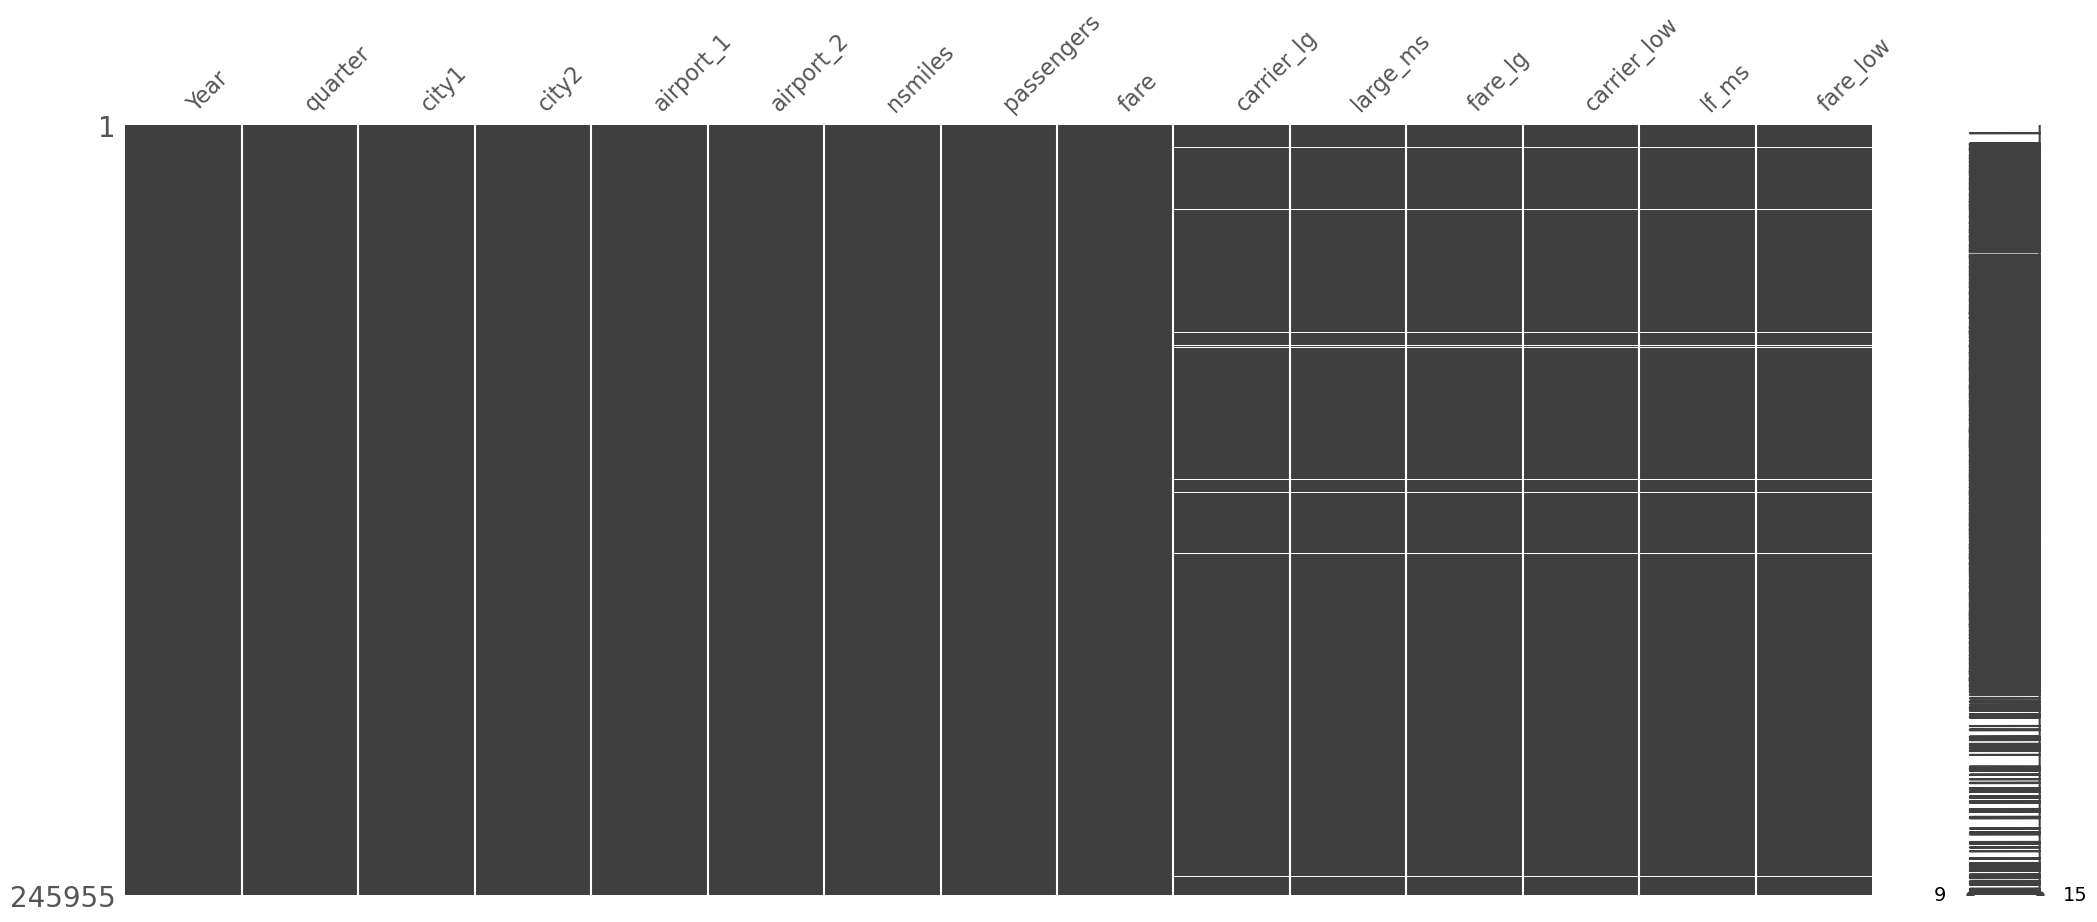

In [10]:
import missingno as msn

msn.matrix(data) #eksik değerleri temizlemeden önce kullan güzel gözüküyor...:)

In [11]:
# Grup 1 sütunları
grup1 = ['carrier_lg', 'large_ms', 'fare_lg']

# Grup 1'deki eksik değerlerin olduğu satırların indekslerini belirleyin
eksik_indeks_grup1 = data[data[grup1].isna().any(axis=1)].index

print("Grup 1'de tüm sütunlarda eksik değerlerin ortak olduğu satır sayısı:", len(eksik_indeks_grup1))


Grup 1'de tüm sütunlarda eksik değerlerin ortak olduğu satır sayısı: 1540


In [12]:
# Grup 1 sütunları
grup2 = ['carrier_low', 'lf_ms', 'fare_low']

# Grup 1'deki eksik değerlerin olduğu satırların indekslerini belirleyin
eksik_indeks_grup2 = data[data[grup2].isna().any(axis=1)].index

print("Grup 2'de tüm sütunlarda eksik değerlerin ortak olduğu satır sayısı:", len(eksik_indeks_grup2))


Grup 2'de tüm sütunlarda eksik değerlerin ortak olduğu satır sayısı: 1612


1612 / data["carrier_low"].shape[0]  ***!!!!!! yüzde 65 değil yüzde 0.65  :(:(:(:( ağlayacam ha***

In [13]:
# Sütun gruplarını tanımlayın
grup1 = ['carrier_lg', 'large_ms', 'fare_lg']
grup2 = ['carrier_low', 'lf_ms', 'fare_low']

# Eksik değerlerin olduğu satırların indekslerini belirleyin
eksik_indeks_grup1 = data[data[grup1].isna().any(axis=1)].index
eksik_indeks_grup2 = data[data[grup2].isna().any(axis=1)].index

# Her iki grup arasında ortak eksik değer var mı ?
ortak_eksik_indeks_grup1_grup2 = eksik_indeks_grup1.intersection(eksik_indeks_grup2)

print("Grup 1 ve Grup 2 arasında ortak eksik değerlerin olduğu satır sayısı:", len(ortak_eksik_indeks_grup1_grup2))

Grup 1 ve Grup 2 arasında ortak eksik değerlerin olduğu satır sayısı: 1540


buradan şunu anlıyorum ki (carrier_lg, large_ms,fare_lg) değerleri eksik ise (carrier_low , lf_ms, fare_low) değerleri de eksik ancak (carrier_low , lf_ms, fare_low) grubu fazladan eksik kayıtlara da sahip.

Çok önemli değil bence çünkü eksik kayıt sayısı %1 den bile düşük olduğundan dolayı silme yoluna gideceğim. Belik sonradan güncellerim kodu ancak yukarısı tamamen fazladan çalışma aslında.

In [14]:
df = data.dropna(how = "any")

In [15]:
df.isna().sum().sum() # toplam eksik veriye sahip kayıt sayısı

0

In [16]:
df[df.duplicated()] 
# tüm özellikleri tekrar eden kayıt yok. Bu kısmı bi sorarsın olmazsa. daha farklı bir kontrol yapabilir miydim diye ?

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low


Tekrarlı veri yok deyip geçiyorum şimdilik.

# Feature Engineering

In [17]:
df["dep_city"] = df["city1"].str.split("," , expand=True)[0]
df["dep_state"] = df["city1"].str.split("," , expand=True)[1]

In [18]:
df["dest_city"] = df["city2"].str.split("," , expand=True)[0]
df["dest_state"] = df["city2"].str.split("," , expand=True)[1]

In [19]:
# df["city1"].str.split("," , expand=True)[0].str.split("/", expand = True)
# bu kadar ayırmak çok mantıksız çünkü Allentown/Bethlehem/Easton gibi gruplar hep bir arada kayıt edilmiş.

In [20]:
df['fare_per_mile'] = df['fare'] / df['nsmiles']

In [21]:
df[['fare_per_mile']].head()

,fare_per_mile
0,0.083948
1,0.215392
2,0.318207
3,0.314897
4,0.539970


In [22]:
df.head(15)

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,dep_city,dep_state,dest_city,dest_state,fare_per_mile
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970
5,2021,3,"Albuquerque, NM","Boston, MA (Metropolitan Area)",ABQ,BOS,1974,153,324.97,AA,0.4263,323.73,WN,0.1609,298.20,Albuquerque,NM,Boston,MA (Metropolitan Area),0.164625
6,2021,3,"Albuquerque, NM","Boston, MA (Metropolitan Area)",ABQ,MHT,1974,16,315.90,WN,0.7285,270.42,WN,0.7285,270.42,Albuquerque,NM,Boston,MA (Metropolitan Area),0.160030
7,2021,3,"Albuquerque, NM","Boston, MA (Metropolitan Area)",ABQ,PVD,1974,22,329.22,WN,0.5415,271.60,WN,0.5415,271.60,Albuquerque,NM,Boston,MA (Metropolitan Area),0.166778
8,2021,3,"Albuquerque, NM","Washington, DC (Metropolitan Area)",ABQ,BWI,1670,159,255.89,WN,0.7212,244.89,WN,0.7212,244.89,Albuquerque,NM,Washington,DC (Metropolitan Area),0.153228
9,2021,3,"Albuquerque, NM","Washington, DC (Metropolitan Area)",ABQ,DCA,1670,151,291.16,AA,0.4404,296.88,WN,0.3197,247.20,Albuquerque,NM,Washington,DC (Metropolitan Area),0.174347


### Sayısal ve Kategorik değişkenleri ayırmakla işe başlayalım : 
Bu işi her dataset için yapmam gerektiği için aşağıdaki kodu hazırlayıp bir kenara attım , "önemli parçalar hazinesine".

kategorik veya olduğu veri tipine bakılarak anlaşılabilir ancak örneğin  "quarter" sütunu sayısal tipte olsa da kategori belirtmektedir. Bundan dolayı num_but_cat adlı farklı bir liste oluşturulur.

kategorik veirlerden eğer ki alt sınıf sayısı aşırı fazla olanlar varsa bunların incelenmesi anlamlı sonuçlar çıkarmaz. BU özelliklere kardinalitesi yüksek özellikler denir. Bunların pek anlamı yoktur. 

yukarıdaki iki şeye dikkat ederek sayısal ve kategorik değişkenleri ayırdıktan sonra bunların üzerinde istediğim zaman farklı işlemler gerçekleştirebiliyorum , grafik çizerken sorun yaşamıyorum falan filan.

###### Bu aşamadan sonrası sayısal ve kategorik değişkenlerin incelenmesi olacak. Sonra grafikler..

In [23]:
def grab_col_names( dataframe, cat_th = 10 , car_th = 20 ) :
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['object' , 'category' , 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df , cat_th= 5 ,car_th=20 )
print("**"*10)
print("Categorical Columns:", cat_cols)
print("--"*20)
print("Numerical Columns:", num_cols)
print("--"*55)
print("Categorical But High Cardinality Columns:", cat_but_car)

Observations: 244343
Variables: 20
cat_cols: 1
num_cols: 9
cat_but_car: 10
num_but_cat: 1
********************
Categorical Columns: ['quarter']
----------------------------------------
Numerical Columns: ['Year', 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low', 'fare_per_mile']
--------------------------------------------------------------------------------------------------------------
Categorical But High Cardinality Columns: ['city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low', 'dep_city', 'dep_state', 'dest_city', 'dest_state']


Süper fonksiyonel bir şekilde devam ediyorum :) bu bilgi cebimde olmalı :)

In [25]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,244343.0,2008.577508,8.688732,1993.000000,2001.000000,2009.000000,2016.000000,2024.000000
nsmiles,244343.0,1189.421056,702.889233,109.000000,626.000000,1021.000000,1735.000000,2724.000000
passengers,244343.0,301.442558,512.498452,0.000000,22.000000,114.000000,342.000000,8301.000000
fare,244343.0,218.443940,79.533099,50.000000,164.690000,209.270000,262.615000,3377.000000
large_ms,244343.0,0.665436,0.224410,0.100000,0.480000,0.652800,0.872100,1.000000
fare_lg,244343.0,218.715074,84.659619,50.000000,161.510000,208.040000,263.640000,2725.600000
lf_ms,244343.0,0.450438,0.332669,0.010000,0.158000,0.360000,0.750000,1.000000
fare_low,244343.0,190.675939,73.577694,50.000000,140.060000,181.630000,230.040000,2725.600000
fare_per_mile,244343.0,0.255327,0.202659,0.022971,0.138346,0.193511,0.298867,5.334928


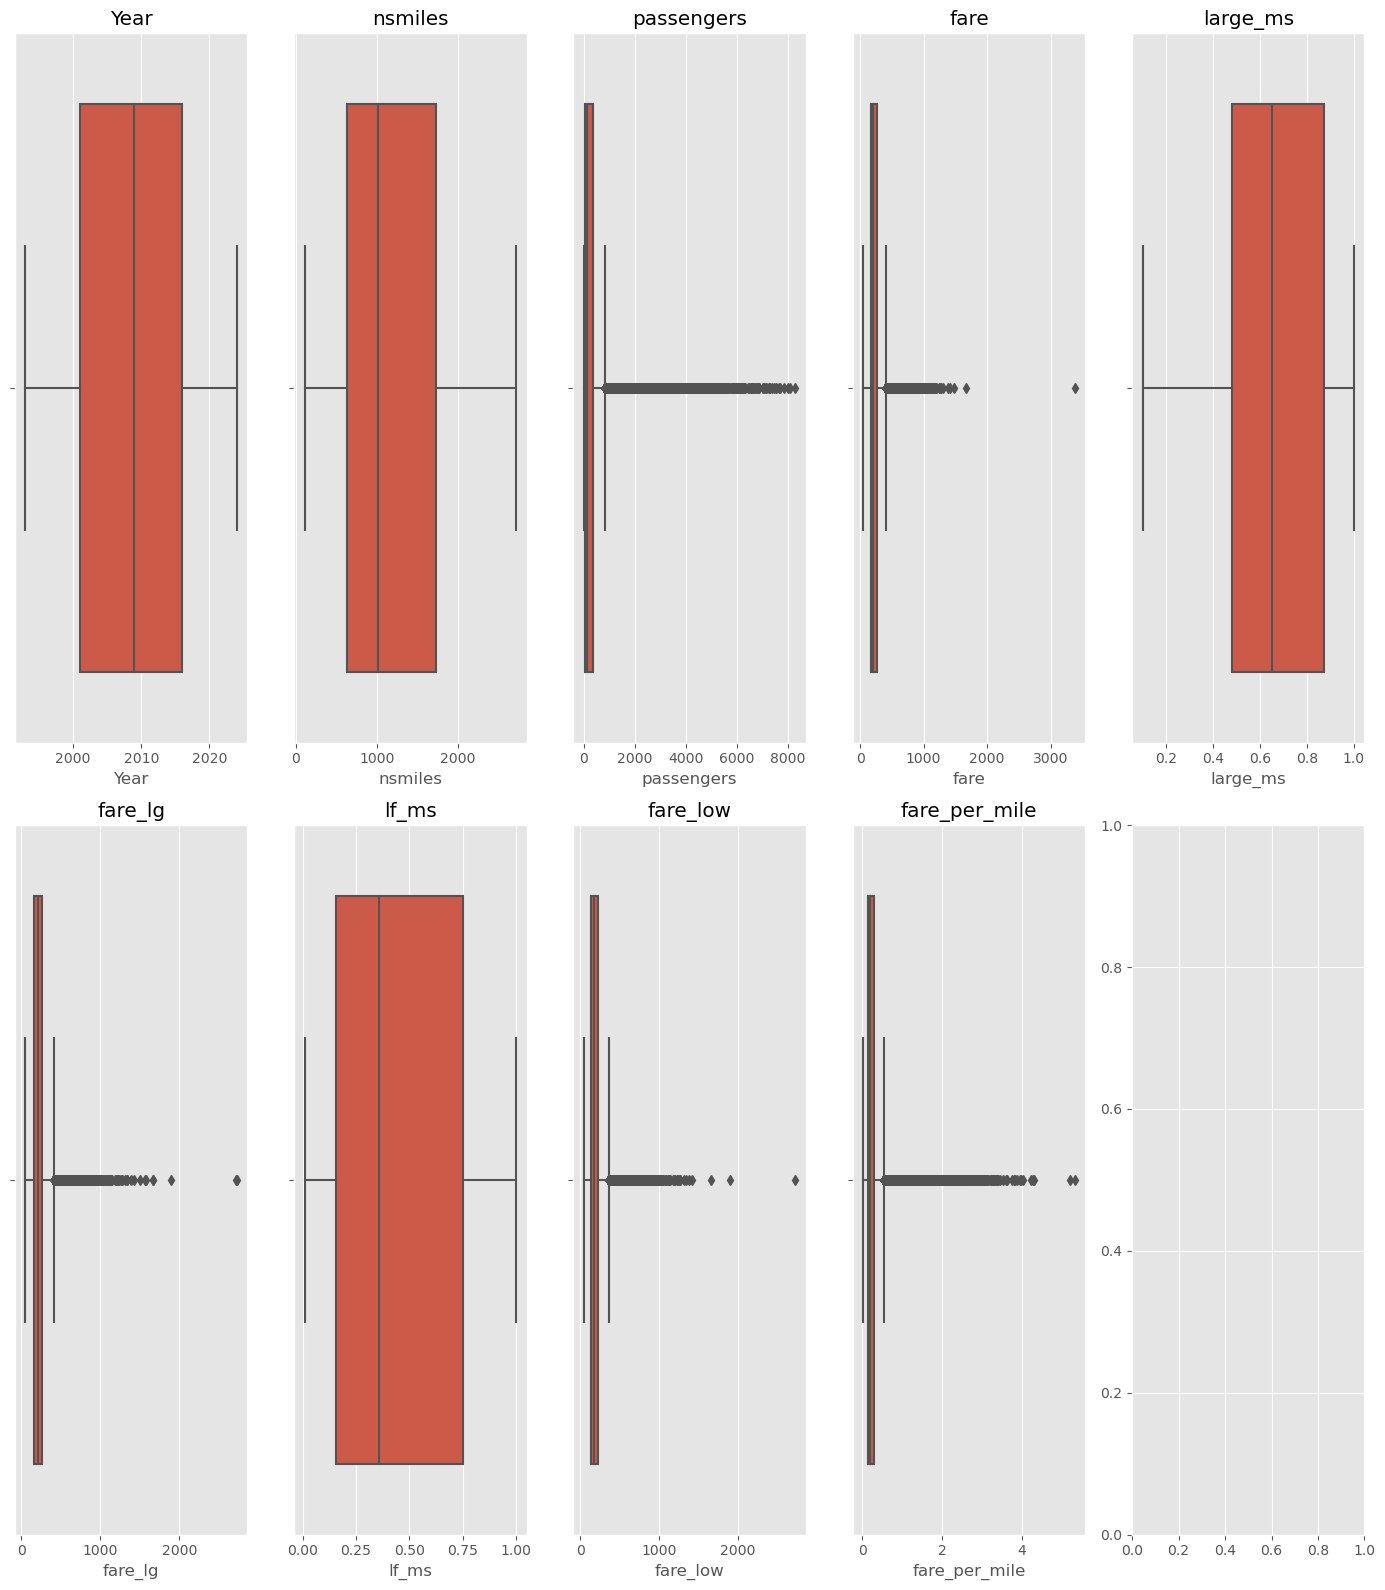

In [26]:
fig , ax = plt.subplots(nrows = 2, ncols = 5 , figsize =(14, 16))
# tüm sayıasl değişkenler için boxplot yardımıyla outlier kontrolü yapmak istiyorum.
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[i // 5, i % 5])  # Doğru indeksleme , bu kısım cehennem gibi ama faydalıydı...
    ax[i // 5, i % 5].set_title(col)

# Layout'u sıkılaştır
plt.tight_layout()
plt.show()
# indeksleme olayını bir yere kaydet , çok uğraştırdı...

###### Görüldüğü üzere sayısal olan sütunlarda nsmiles , large_mslf_ms , Year , haricinde outlier veri fazlasıyla mevcut... 

3.1 Identifying Outliers using Z-Score


In [27]:
df.shape

(244343, 20)

In [28]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[num_cols])

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove rows with outliers based on Z-score
outlier_rows = outliers.any(axis=1)
df_no_outliers = df[~outlier_rows]


print("Orijinal veri setinin boyutu:", df.shape)
print("Outlier içeren veri setinin boyutu:", df[outlier_rows].shape)
print("Outlier olmayan veri setinin boyutu:", df_no_outliers.shape)

Orijinal veri setinin boyutu: (244343, 20)
Outlier içeren veri setinin boyutu: (13598, 20)
Outlier olmayan veri setinin boyutu: (230745, 20)


yani neredeyse tüm sütunlarda outlier var , 9390 kayıt outlier olarak değerlendirilebilir ! Ancak önemli bir nokta var ki "Year" sütununda bulunan değerler Outlier olarak değerlendirilmemelidir. Bunun için o sütun bu kontrolün dışında tutlmalı ! ama yukarıda sadece num_cols değil tüm veri setini de versem sonuç aynı geliyor.

iki yöntem arasında neden hiçbir fark olmadı sor !!!

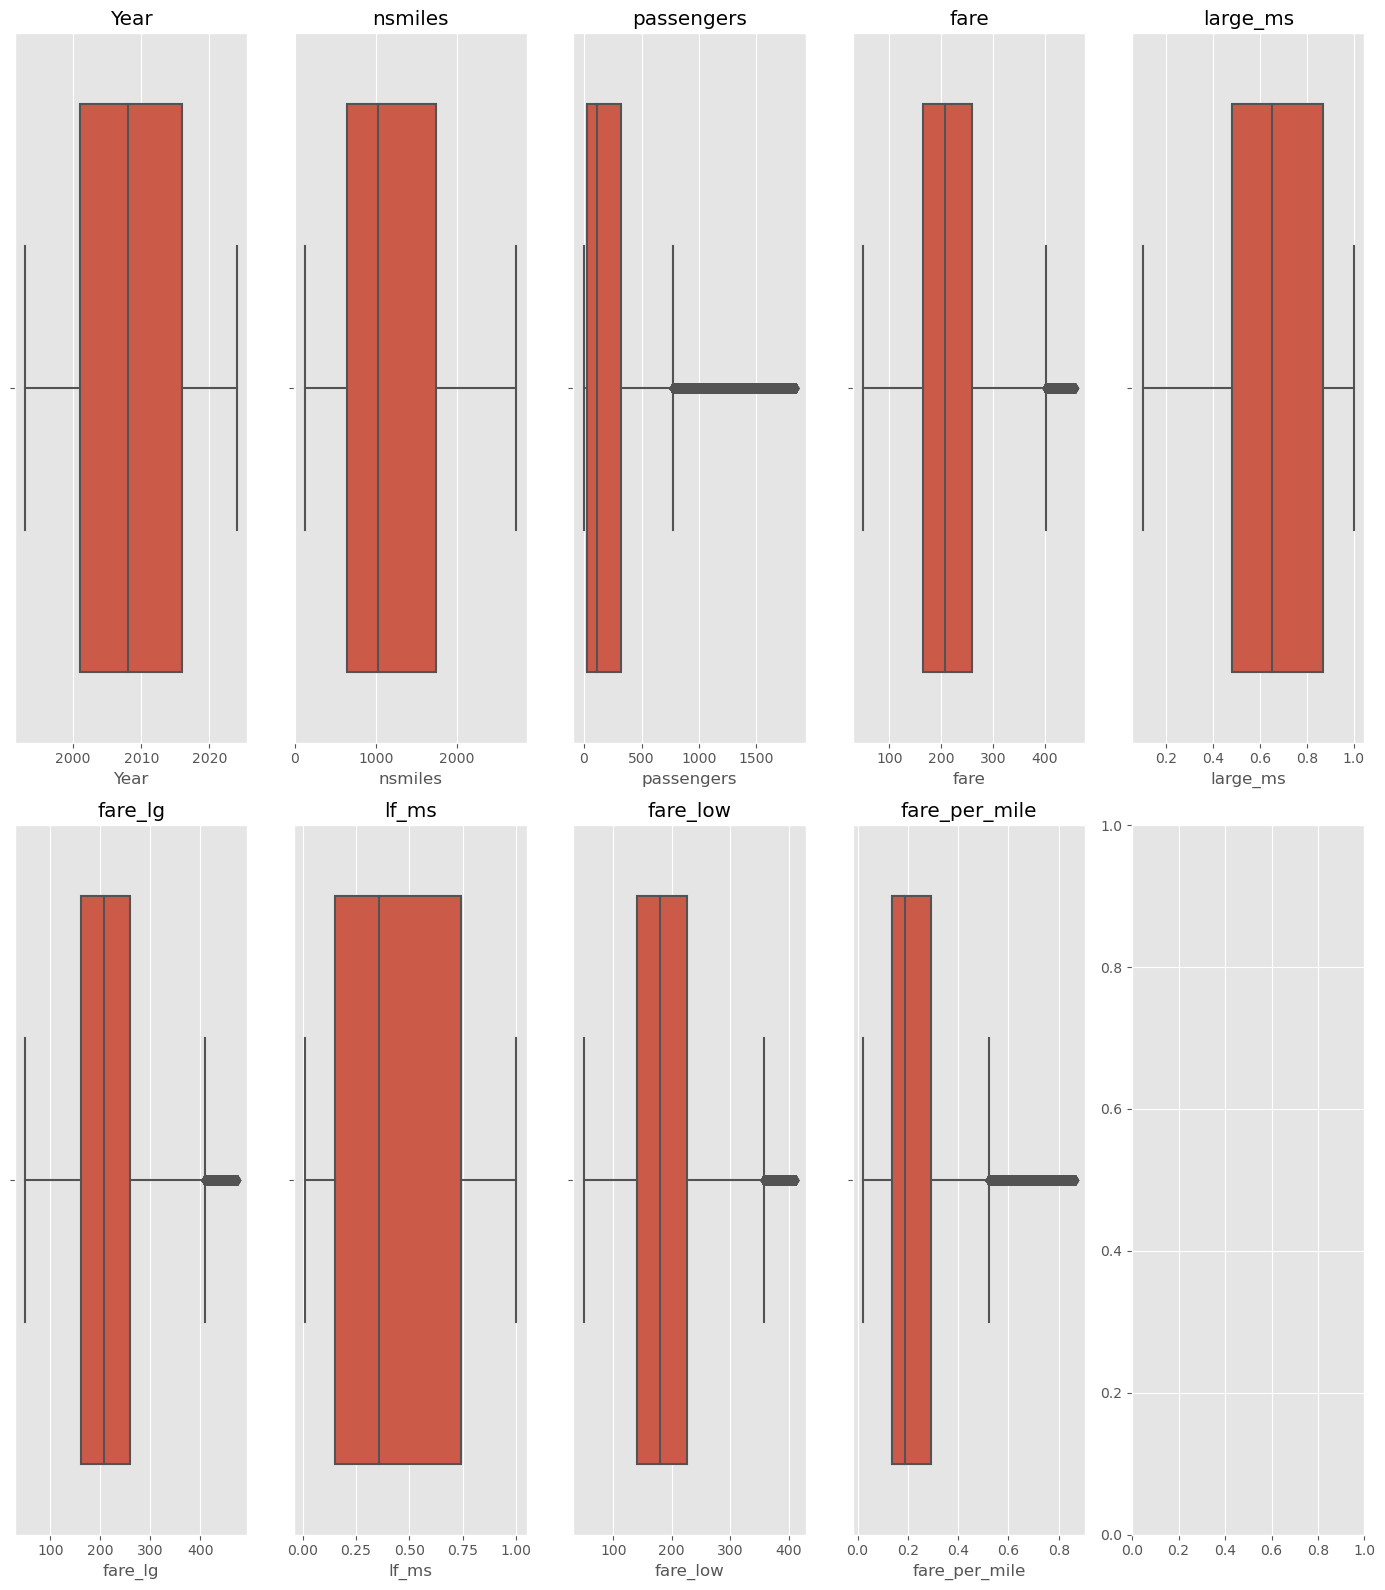

In [29]:
fig , ax = plt.subplots(nrows = 2, ncols = 5 , figsize =(14, 16))
# tüm sayıasl değişkenler için boxplot yardımıyla outlier kontrolü yapmak istiyorum.
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_no_outliers, x=col, ax=ax[i // 5, i % 5])  # Doğru indeksleme , bu kısım cehennem gibi ama faydalıydı...
    ax[i // 5, i % 5].set_title(col)


plt.tight_layout() #  grafiklerin düzenini otomatik olarak ayarlıyor.
plt.show()

yani tüm sütunlarda outlier var , 9390 kayıt outlier olarak değerlendirilebilir !
Ancak önemli bir nokta var ki "Year" sütununda bulunan değerler Outlier olarak değerlendirilmemelidir. Bunun için o sütun bu kontrolün dışında tutlmalı ! ama yukarıda sadece num_cols değil tüm veri setini de versem sonuç aynı geliyor.

iki yöntem arasında neden hiçbir fark olmadı sor !!!

In [30]:
df = df_no_outliers

In [31]:
df.shape # d yazmaya daha alışkınım.

(230745, 20)

In [32]:
df.head()

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,dep_city,dep_state,dest_city,dest_state,fare_per_mile
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970


In [33]:
# df = df.drop(columns=["city1","city2"] , axis = 1)
# df = df[['Year', 'quarter', 'airport_1', 'airport_2', 'dep_city', 'dep_state', 'dest_city', 'dest_state',
#         'nsmiles', 'passengers', 'fare','fare_per_mile' , 
#         'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', ]]
df.head()

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,dep_city,dep_state,dest_city,dest_state,fare_per_mile
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970


Belki daha önceden yapmalıydım ancak veri önişlemenin önemli adınlarından biri de Feature Engineering.  city1 ve city2 sütunları birden fazla bilgi taşıyor. Bu bilgileri ayırıp her birinden ayrı sütun oluşturmalıyız.
**yukarıdaki feature engineering kısmını burada yaptım..)**

EDA için uygun halde şu anda :) Şükür...

Son kısım ve aralarda gereksiz uzatılmış bölümler olabilir... Encoding işini unutmamak gerekli maalesef...

Farklı bir notebook da çok güzel sorular sorup cevaplamış biri çok beğerndim aynı soruları sorarak ilerleyeceğim :)

1. **How are the fare and nsmiles distributed?**


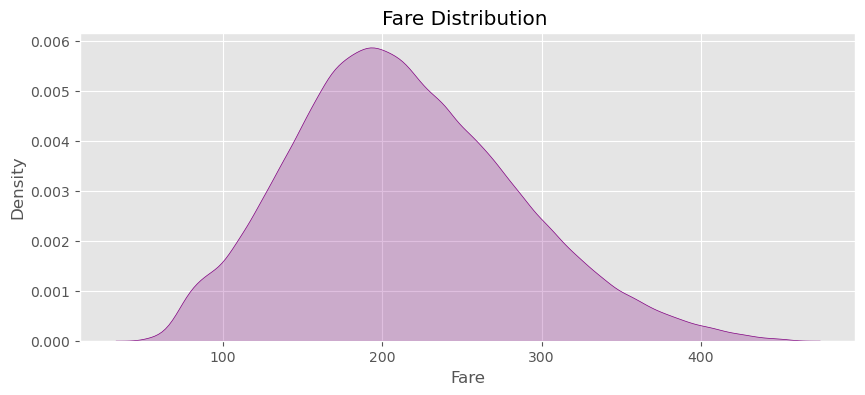

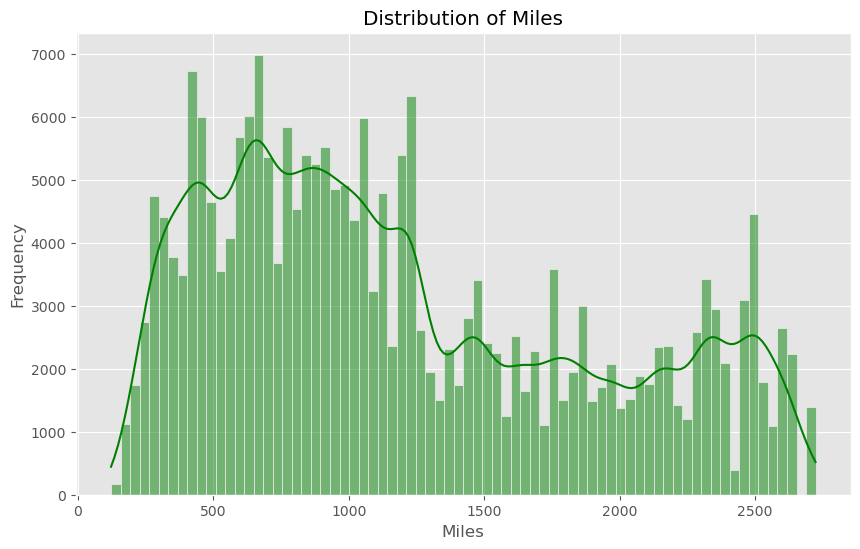

In [34]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data = df['fare'], color='purple', fill=True)

plt.title('Fare Distribution ')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# Distribution of nsmiles
plt.figure(figsize=(10, 6))
sns.histplot(df['nsmiles'], kde=True, color='green')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

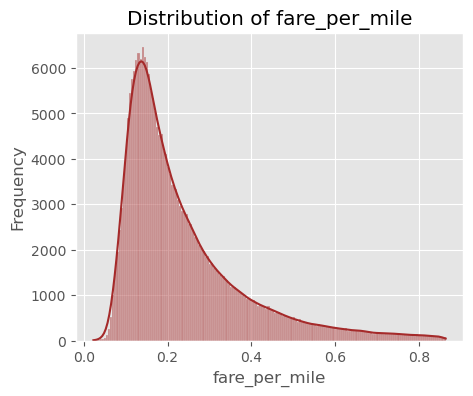

In [35]:
# mil başına ödenenen ücret 
plt.figure(figsize=(5, 4))
sns.histplot(df['fare_per_mile'], kde=True, color='brown')
plt.title('Distribution of fare_per_mile')
plt.xlabel('fare_per_mile')
plt.ylabel('Frequency')
plt.show()
# mil başına ödenen ücret yükseldikçe sıklık da düşüyor.

2. **What is the relationship between fare and nsmiles?**

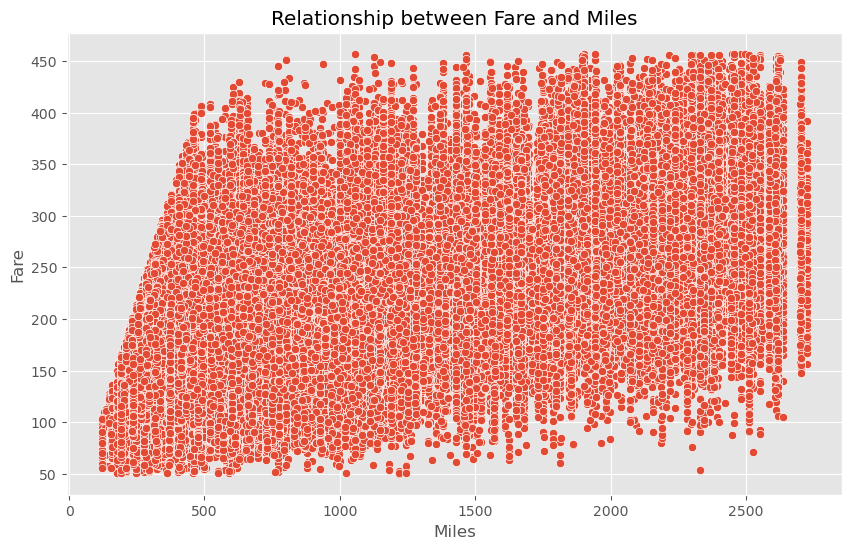

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='fare', data=df)
plt.title('Relationship between Fare and Miles')
plt.xlabel('Miles')
plt.ylabel('Fare')
plt.show()

In [37]:
df["cat_quarter"] = pd.cut(df.quarter ,[0,1,2,3,4] ,labels=[1,2,3,4]) # istersen hue olarak ekle.

3. What is the average fare by year?

<Axes: xlabel='Year', ylabel='fare'>

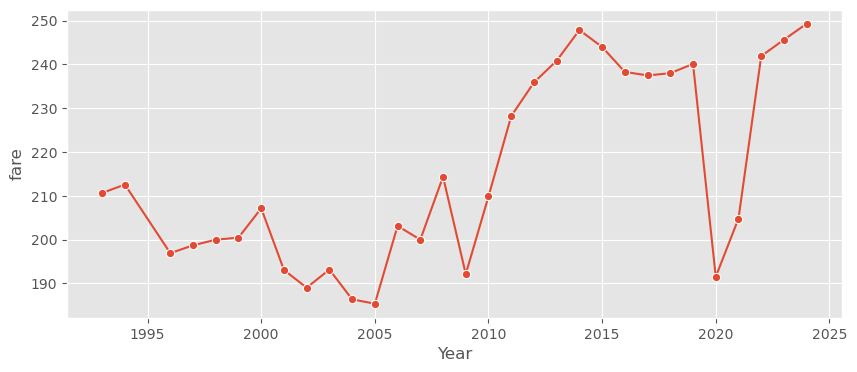

In [38]:
plt.figure(figsize=(10, 4))

sns.lineplot(x = "Year" , y = "fare" , data=df.groupby('Year')['fare'].mean().reset_index() , marker = "o" )

4. **How does the passenger count vary across different dep_city ?**

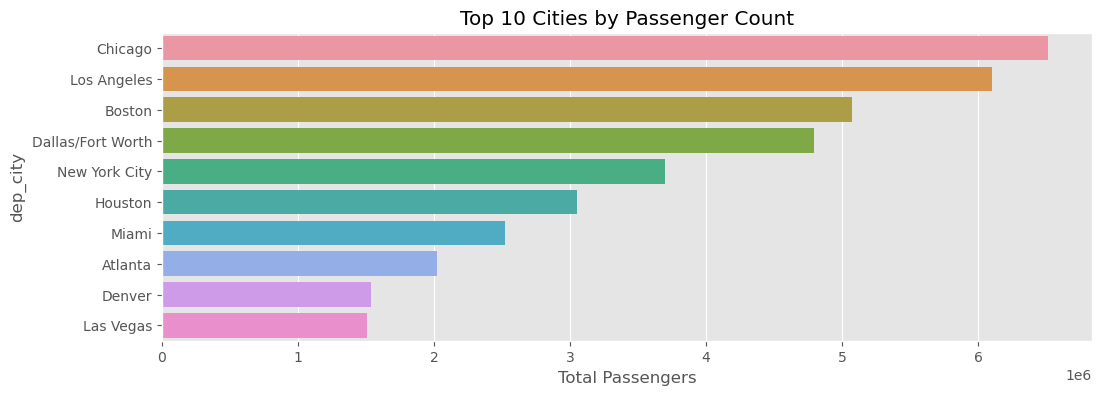

In [39]:
plt.figure(figsize=(12, 4))
top_cities = df.groupby('dep_city')['passengers'].sum().nlargest(10).reset_index()
sns.barplot(x='passengers', y='dep_city', data=top_cities)
plt.title('Top 10 Cities by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('dep_city')
plt.show()

5. How does the passenger count vary across different dep_state ?

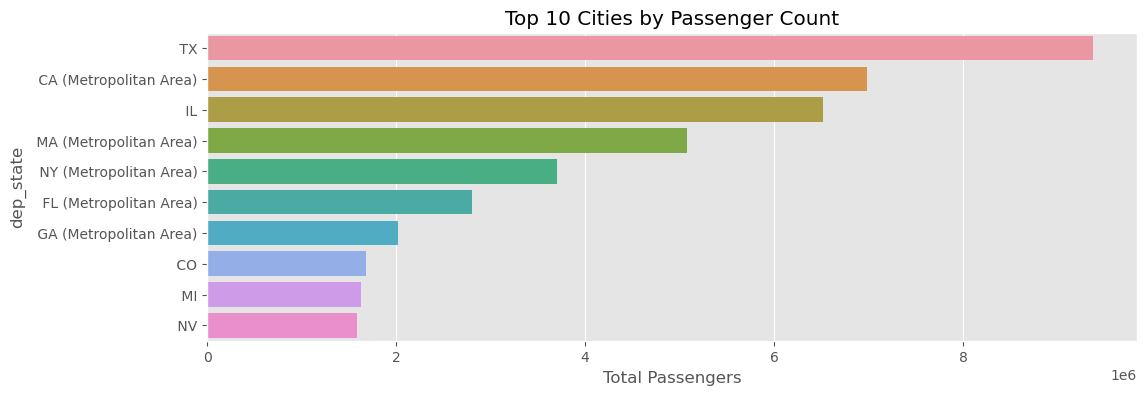

In [40]:
plt.figure(figsize=(12, 4))
top_cities = df.groupby('dep_state')['passengers'].sum().nlargest(10).reset_index()
sns.barplot(x='passengers', y='dep_state', data=top_cities)
plt.title('Top 10 Cities by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('dep_state')
plt.show()

### it changes :)

In [41]:
df.head()

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,dep_city,dep_state,dest_city,dest_state,fare_per_mile,cat_quarter
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948,3
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392,3
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207,3
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897,3
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970,3


6. **What is the distribution of carrier_lg and carrier_low market shares?**

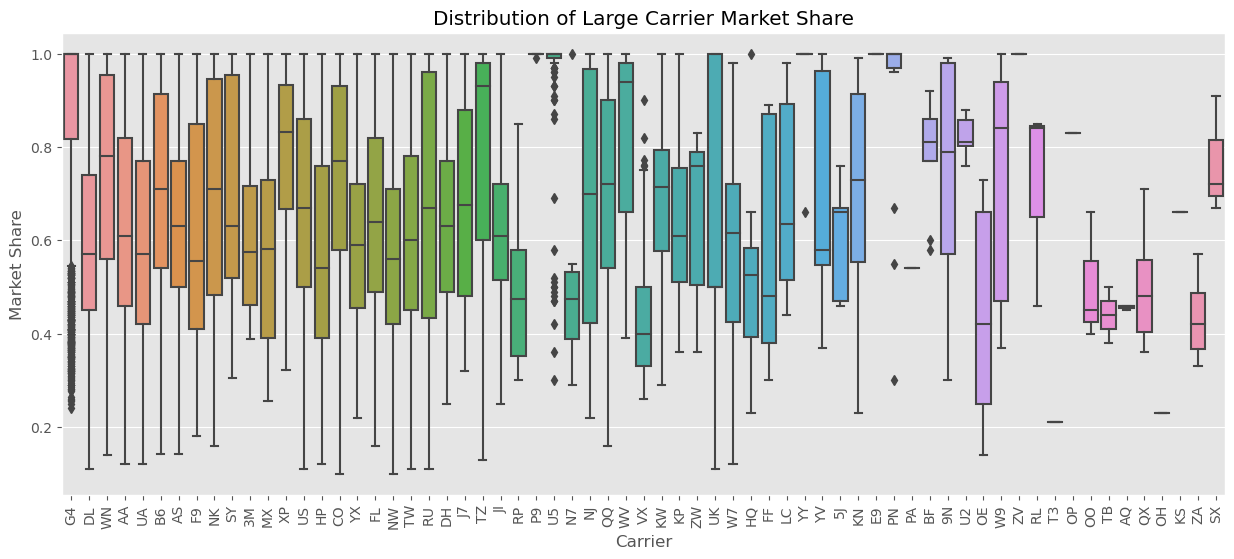

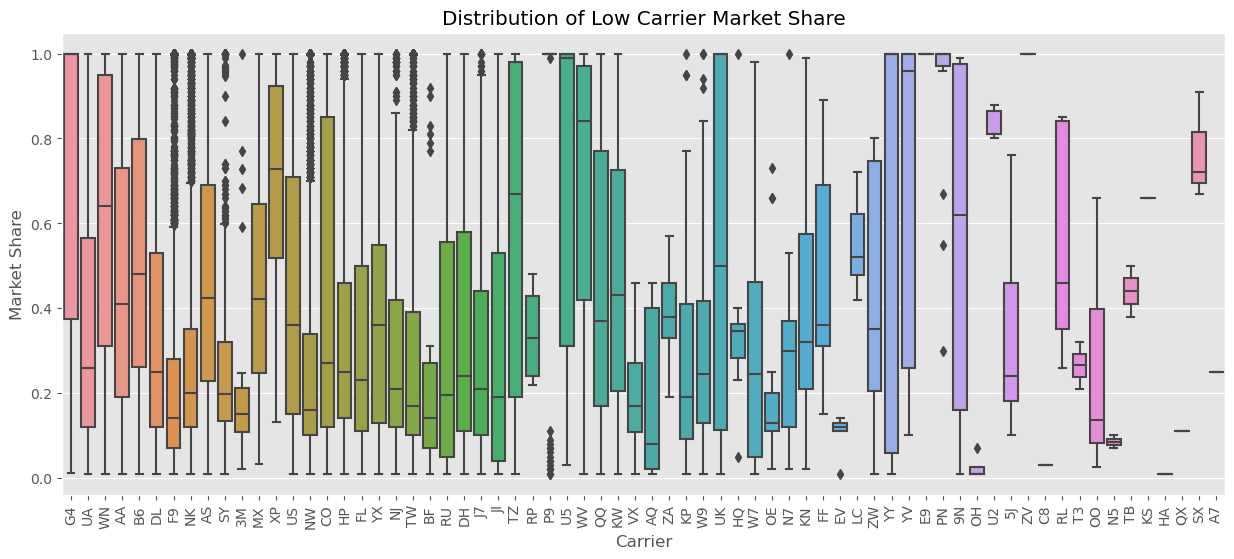

In [42]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=df)
plt.title('Distribution of Large Carrier Market Share')
plt.xlabel('Carrier')
plt.xticks(rotation=90)
plt.ylabel('Market Share')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=df)
plt.title('Distribution of Low Carrier Market Share')
plt.xlabel('Carrier')
plt.xticks(rotation=90)
plt.ylabel('Market Share')
plt.show()

7. **Which dep_city and dest_city combinations have the highest average fare?**

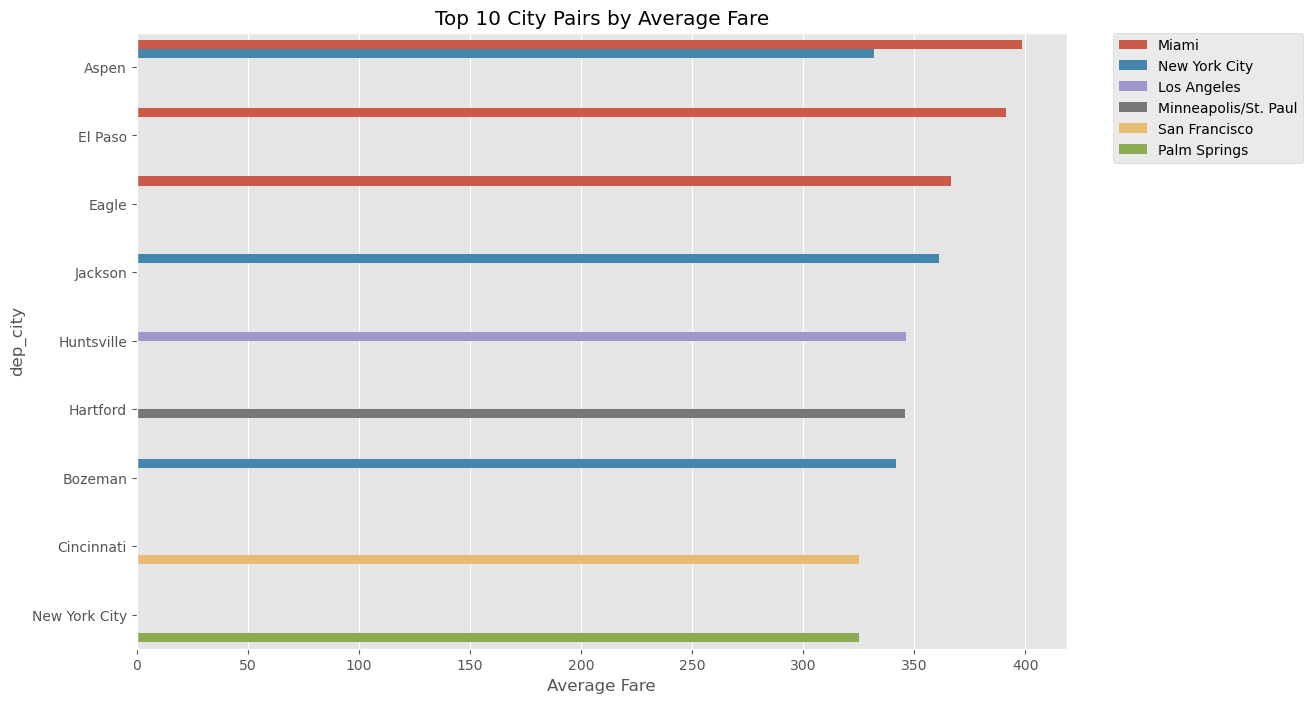

In [43]:
# Calculate the average fare for each city pair
city_pairs_fare = df.groupby(['dep_city', 'dest_city'])['fare'].mean().reset_index()

# Sort by the highest average fare and take the top 10
top_city_pairs_fare = city_pairs_fare.nlargest(10, 'fare')

plt.figure(figsize=(12, 8))
sns.barplot(x='fare', y='dep_city', hue='dest_city', data=top_city_pairs_fare)
plt.title('Top 10 City Pairs by Average Fare')
plt.xlabel('Average Fare')
plt.ylabel('dep_city')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

8. **What are the busiest airports in terms of passenger count?**

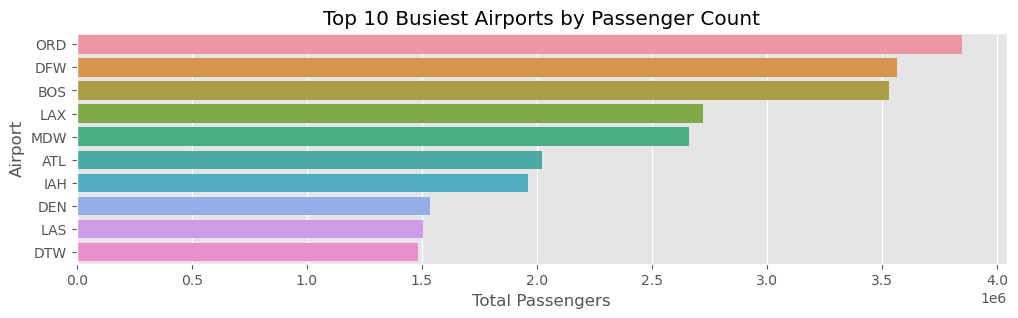

In [44]:
# Group by airport_1 and airport_2 separately and sum passengers
airport1_passengers = df.groupby('airport_1')['passengers'].sum().reset_index()
airport2_passengers = df.groupby('airport_2')['passengers'].sum().reset_index()

# Concatenate the results
busiest_airports = pd.concat([airport1_passengers, airport2_passengers], ignore_index=True)
busiest_airports = busiest_airports.groupby('airport_1')['passengers'].sum().reset_index()

# Top 10 busiest airports
top_airports = busiest_airports.nlargest(10, 'passengers')

plt.figure(figsize=(12, 3))
sns.barplot(x='passengers', y='airport_1', data=top_airports)
plt.title('Top 10 Busiest Airports by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('Airport')
plt.show()

9. **How does market share (large_ms vs lf_ms) vary across different year?**

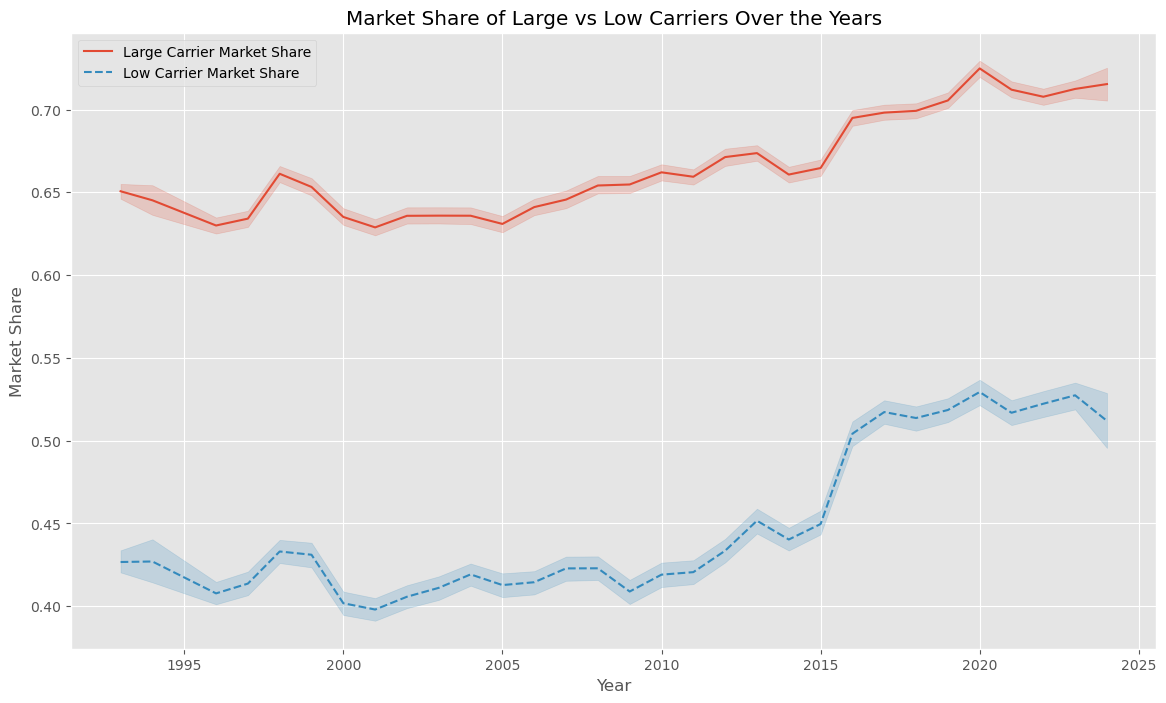

In [45]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='large_ms', data=df, label='Large Carrier Market Share')
sns.lineplot(x='Year', y='lf_ms', data=df, label='Low Carrier Market Share', linestyle='--')
plt.title('Market Share of Large vs Low Carriers Over the Years')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.legend()
plt.show()

In [47]:
df.columns

Index(['Year', 'quarter', 'city1', 'city2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'dep_city', 'dep_state',
       'dest_city', 'dest_state', 'fare_per_mile', 'cat_quarter'],
      dtype='object')

In [49]:
df.drop(columns=["cat_quarter"] , inplace=True)

In [50]:
df.columns

Index(['Year', 'quarter', 'city1', 'city2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'dep_city', 'dep_state',
       'dest_city', 'dest_state', 'fare_per_mile'],
      dtype='object')

In [52]:
# df.to_csv('Flights.csv')